In [1]:
import jeans 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.8
rm = 10
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)


profile = jeans.squashed(rm, M200, c, alpha=0.3, q0=q0, Phi_b=Phi_b)

if profile:
    print("Profile generated successfully")

compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.137 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 2.182 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.381 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 1.910 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 1.910 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 2.190 seconds.
Profile generated successfully


In [3]:
profile.outer.halo_type

'Einasto'

In [16]:
import datetime as dt 

now = dt.datetime.now()
print(now.strftime("%Y_%m_%d_%H_%M_%S"))

2025_09_24_14_48_54


In [4]:
filename = "example_profile.npz"
profile.save(filename)

In [5]:
new_profile = jeans.load(filename)

In [6]:
new_profile.outer.alpha

0.3

In [12]:
profile.outer.halo_type

'Einasto'

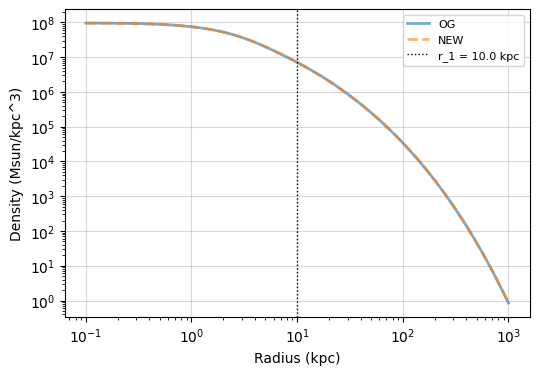

In [7]:

r = np.logspace(-1,3, num=100)

plt.figure(figsize=(6,4))
plt.loglog(r, profile.rho_sph_avg(r), label='OG', c='C0', alpha=0.6, ls='-', lw=2)
plt.loglog(r, new_profile.rho_sph_avg(r), label='NEW',  c='C1', alpha=0.6, ls='--', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.show()

In [3]:
r = np.logspace(-1,3, num=30)

check = profile.q_from_force(r, Lmax=0)

print(check)

(array([  6.48286692,   9.95629278,  14.18192116,  19.7103748 ,
        27.11520459,  37.07100957,  50.36073497,  67.79413133,
        89.94559661, 116.57896602, 145.78145595, 173.49237959,
       194.84577065, 207.33557092, 212.49851374, 214.04081592,
       214.48779743, 214.44805849, 213.31520454, 210.05979412,
       203.83581758, 194.26343431, 181.50460275, 166.19890263,
       149.30897893, 131.91061949, 114.98643866,  99.2690792 ,
        85.17643759,  72.84073821]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))


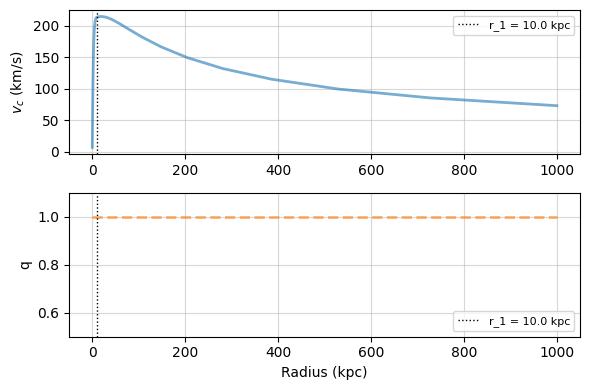

In [4]:
vc, q = check

plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.plot(r, vc, c='C0', alpha=0.6, ls='-', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.ylabel('$v_c$ (km/s)')
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)

plt.subplot(2,1,2)
plt.plot(r, q, c='C1', alpha=0.6, ls='--', lw=2)
plt.axvline(profile.r1, color='k', ls=':', lw=1, label=f'r_1 = {profile.r1:.1f} kpc')
plt.xlabel('Radius (kpc)')
plt.ylabel('q')
plt.ylim(0.5,1.1)
plt.grid(True, which='major', alpha=0.5, axis='both')
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()

# Plotting Einasto and Jeans profiles

In [42]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.8
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# # Example baryonic potential: Miyamoto-Nagai disk
# def Phi_b(r, th):
#     Md = 6.4e10
#     a = 3.5
#     b = 0.53
#     return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

Phi_b = None 

# pure Einasto profile 
try:
    profile_E = jeans.cdm(M200, c, alpha=0.3, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating profile: {e}")

# squashed Einasto profile
rm_E = 1 
alpha1 = 0.15
try:
    profile_E_s1 = jeans.squashed(rm_E, M200, c, alpha=alpha1, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile: {e}")
    
alpha2 = 0.91 # Ou paper fit
try:
    profile_E_s2 = jeans.squashed(rm_E, M200, c, alpha=alpha2, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile 2: {e}")    

# Squashed jeans profile
rm_s1 = 1
try:
    profile_s1 = jeans.squashed(rm_s1, M200, c, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating s1 profile: {e}")

rm_s2 = 60
try:
    profile_s2 = jeans.squashed(rm_s2, M200, c, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating s2 profile: {e}")


compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.150 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.004 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 1.958 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.001 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.884 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.884 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 1.359 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-

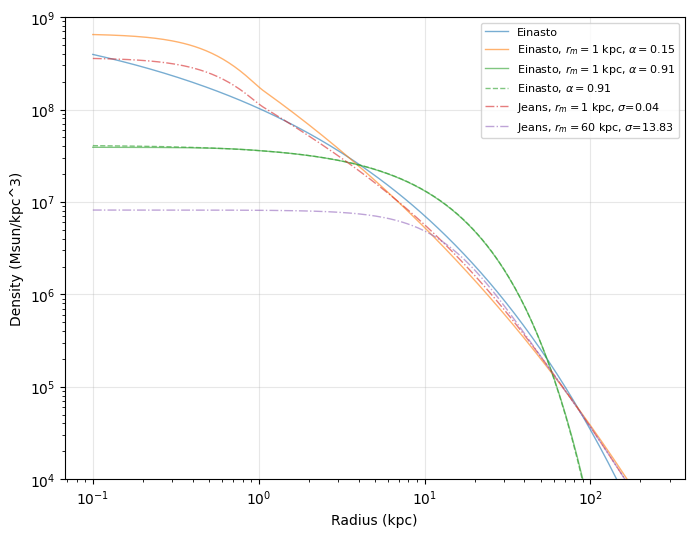

In [44]:
# plot the density profile first 
r = np.geomspace(0.1,250, num=200)

plt.figure(figsize=(8,6))
plt.loglog(r, profile_E.rho_sph_avg(r), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s1.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.outer.rho_sph_avg(r), label=f'Einasto, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='--', lw=1)
plt.loglog(r, profile_s1.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
plt.loglog(r, profile_s2.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)
plt.ylim(1e4, 1e9)
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

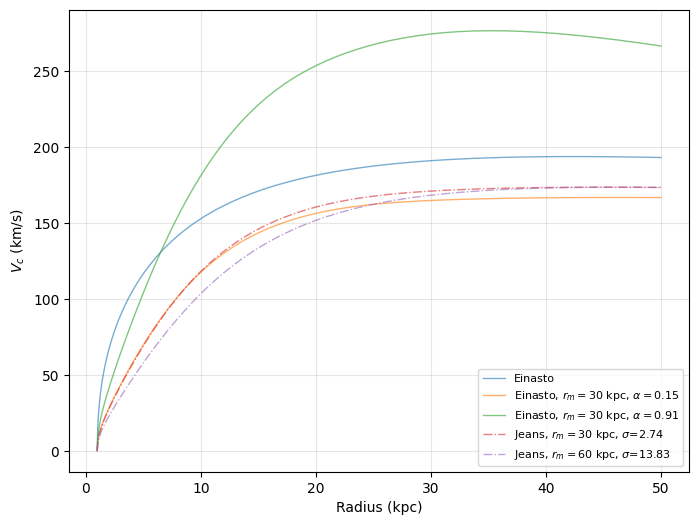

In [34]:
# plot the density profile first 
r = np.geomspace(1,50, num=100)

plt.figure(figsize=(8,6))
plt.plot(r, profile_E.V(r, Lmax=0), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)   
plt.plot(r, profile_E_s1.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_E_s2.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_s1.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
plt.plot(r, profile_s2.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)


plt.xlabel('Radius (kpc)')
plt.ylabel('$V_c$ (km/s)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

In [37]:
vc_s1_L4 = profile_s1.V(r, Lmax=4)

/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/classes.py:488: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(self.Vsq(r, Lmax=Lmax))


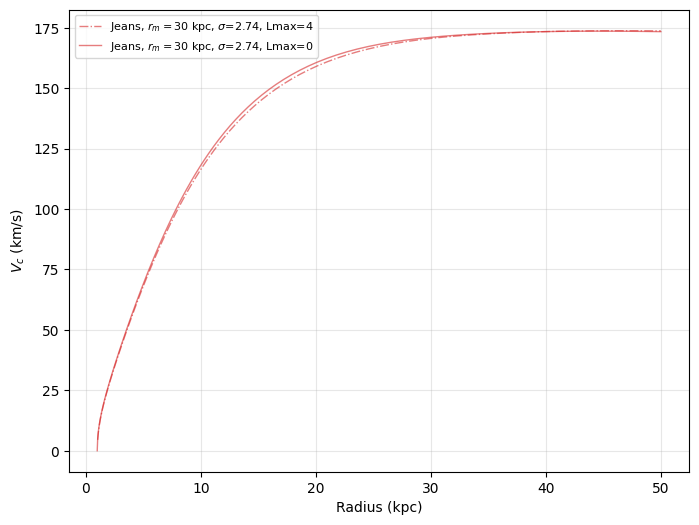

In [38]:
plt.figure(figsize=(8,6))
plt.plot(r, vc_s1_L4, label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}, Lmax=4', c='C3', alpha=0.6, ls='-.', lw=1)
plt.plot(r, profile_s1.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}, Lmax=0', c='C3', alpha=0.6, ls='-', lw=1)
plt.xlabel('Radius (kpc)')
plt.ylabel('$V_c$ (km/s)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

# Einasto and Jeans with Baryons

In [39]:
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q0 = 0.8
GN = 4.302e-6 # gravitational constant in kpc (km/s)^2 Msun^-1

# Example baryonic potential: Miyamoto-Nagai disk
def Phi_b(r, th):
    Md = 6.4e10
    a = 3.5
    b = 0.53
    return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

# Phi_b = None 

# pure Einasto profile 
try:
    profile_E = jeans.cdm(M200, c, alpha=0.3, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating profile: {e}")

# squashed Einasto profile
rm_E = 30 
alpha1 = 0.15
try:
    profile_E_s1 = jeans.squashed(rm_E, M200, c, alpha=alpha1, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile: {e}")
    
alpha2 = 0.91 # Ou paper fit
try:
    profile_E_s2 = jeans.squashed(rm_E, M200, c, alpha=alpha2, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating squashed profile 2: {e}")    

# Squashed jeans profile
rm_s1 = 30 
try:
    profile_s1 = jeans.squashed(rm_s1, M200, c, q0=q0, Phi_b=Phi_b)
except Exception as e:
    print(f"Error generating s1 profile: {e}")

# rm_s2 = 60
# try:
#     profile_s2 = jeans.squashed(rm_s2, M200, c, q0=q0, Phi_b=Phi_b)
# except Exception as e:
#     print(f"Error generating s2 profile: {e}")

compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.150 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.170 seconds.
relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/spherical.py) took 2.305 seconds.
compute_log_q_baryon (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 0.370 seconds.
compute_q_iso (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 2.689 seconds.
compute_q_eff (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 2.689 seconds.
compute_r_sph_grid (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/jeans/tools.py) took 2.568 seconds.
compute_Phi_b_spherical (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-

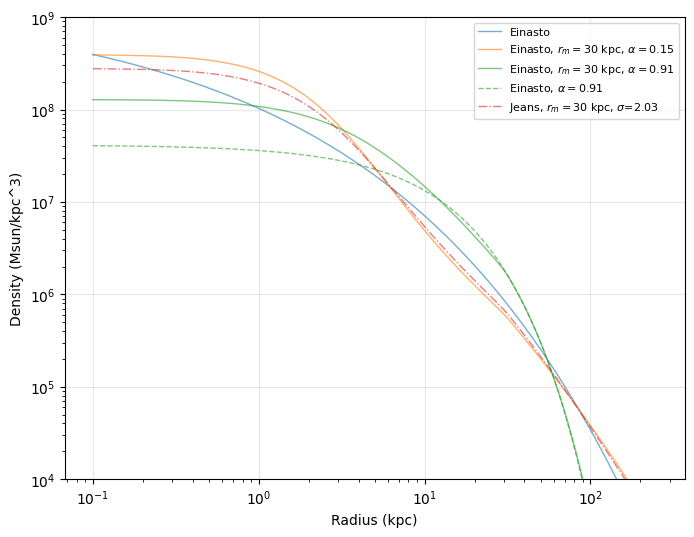

In [40]:
# plot the density profile first 
r = np.geomspace(0.1,250, num=200)

plt.figure(figsize=(8,6))
plt.loglog(r, profile_E.rho_sph_avg(r), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s1.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.rho_sph_avg(r), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.loglog(r, profile_E_s2.outer.rho_sph_avg(r), label=f'Einasto, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='--', lw=1)
plt.loglog(r, profile_s1.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
# plt.loglog(r, profile_s2.rho_sph_avg(r), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)
plt.ylim(1e4, 1e9)
plt.xlabel('Radius (kpc)')
plt.ylabel('Density (Msun/kpc^3)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()

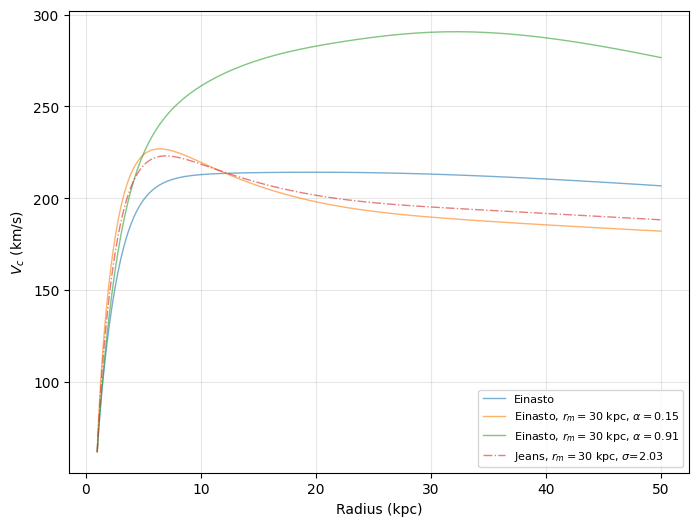

In [41]:
# plot the density profile first 
r = np.geomspace(1,50, num=100)

plt.figure(figsize=(8,6))
plt.plot(r, profile_E.V(r, Lmax=0), label='Einasto', c='C0', alpha=0.6, ls='-', lw=1)   
plt.plot(r, profile_E_s1.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha1}$', c='C1', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_E_s2.V(r, Lmax=0), label=f'Einasto, $r_m={rm_E}$ kpc, $\\alpha={alpha2}$', c='C2', alpha=0.6, ls='-', lw=1)
plt.plot(r, profile_s1.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s1}$ kpc, $\\sigma$={profile_s1.cross_section():.2f}', c='C3', alpha=0.6, ls='-.', lw=1)
# plt.plot(r, profile_s2.V(r, Lmax=0), label=f'Jeans, $r_m={rm_s2}$ kpc, $\\sigma$={profile_s2.cross_section():.2f}', c='C4', alpha=0.6, ls='-.', lw=1)


plt.xlabel('Radius (kpc)')
plt.ylabel('$V_c$ (km/s)')
plt.grid(True, which='major', alpha=0.3, axis='both')
plt.legend(fontsize=8)
plt.show()